# **Customer Segmentation**

## Step 1: Data Preparation

In [ ]:
#need this to open an excel
pip install openpyxl

In [3]:
import pandas as pd

file_path = r"C:\Users\12039\Documents\DATA 6520\Customer-Segmentation\Online Retail.xlsx"
onlineretail = pd.read_excel(file_path)
onlineretail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data Cleaning Considerations

#### Handle Missing Data:
- Check for missing values in crucial columns like customer IDs, transaction dates, and purchase amounts.
- Decide on a strategy for dealing with them, such as filling in missing values or removing rows/columns with too many missing values.

#### Remove Duplicates:
- Look for and eliminate duplicate records to ensure the accuracy of your analysis.

#### Filter Out Irrelevant Data:
- Depending on your analysis, you might need to exclude certain types of transactions (like returns or free samples).  Get rid of negatives

#### Data Type Conversions:
- Ensure that each column is of the appropriate data type. For instance, dates should be in a datetime format, customer IDs might be strings, and monetary values should be numeric.

#### Data Range Consistency:
- Check for any anomalies or inconsistencies in data ranges, such as dates in the future or negative monetary values.

#### Creating RFM Metrics:
- Recency: Calculate the number of days since the last purchase for each customer.
- Frequency: Count the number of purchases for each customer.
- Monetary: Calculate the total amount of money each customer has spent.

#### Handling Outliers:
- Look for outliers in your RFM metrics which can skew your analysis. Depending on your dataset and goals, you might want to cap them, remove them, or treat them separately.

#### Normalization or Standardization (If Required):
- Depending on your segmentation method (like K-means clustering), you might need to normalize or standardize the RFM metrics so they're on the same scale.

In [4]:
onlineretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
# remove missing CustomerID rows since RFM is all about the customer.
onlineretail_cleaned = onlineretail.dropna(subset=['CustomerID']).copy()
onlineretail_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [7]:
onlineretail_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
# Change CustomerID to integer instead of float.  
# This will help with memory but mostly avoid ambiguity and data integrity later
onlineretail_cleaned['CustomerID'] = onlineretail_cleaned['CustomerID'].astype(int)

In [9]:
onlineretail_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
#Filter our negative or zero values
#There is at least 1 negative quantity and 0 for unit price and quanitity
onlineretail_cleaned = onlineretail_cleaned[(onlineretail_cleaned['Quantity'] > 0) & (onlineretail_cleaned['UnitPrice'] > 0)]

In [12]:
onlineretail_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [13]:
onlineretail_cleaned.sort_values(by='UnitPrice')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
279045,561226,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-07-26 10:13:00,0.001,15618,United Kingdom
157195,550193,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom
361741,568375,BANK CHARGES,Bank Charges,1,2011-09-26 17:01:00,0.001,13405,United Kingdom
359871,568200,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom
407634,571904,16045,POPART WOODEN PENCILS ASST,100,2011-10-19 14:41:00,0.040,12522,Germany
...,...,...,...,...,...,...,...,...
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.950,15502,United Kingdom
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.320,12744,Singapore
422376,573080,M,Manual,1,2011-10-27 14:20:00,4161.060,12536,France
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.060,12536,France


In [14]:
# Create total price column & remove duplicates
onlineretail_cleaned['TotalPrice'] = onlineretail_cleaned['Quantity'] * onlineretail_cleaned['UnitPrice']
onlineretail_cleaned = onlineretail_cleaned.drop_duplicates()

#### Now recheck summary stats

In [15]:
onlineretail_cleaned.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865,22.631500
std,180.492832,22.241836,1713.539549,311.099224
min,1.000000,0.001000,12346.000000,0.001000
25%,2.000000,1.250000,13955.000000,4.950000
50%,6.000000,1.950000,15150.000000,12.450000
75%,12.000000,3.750000,16791.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


<AxesSubplot: ylabel='Frequency'>

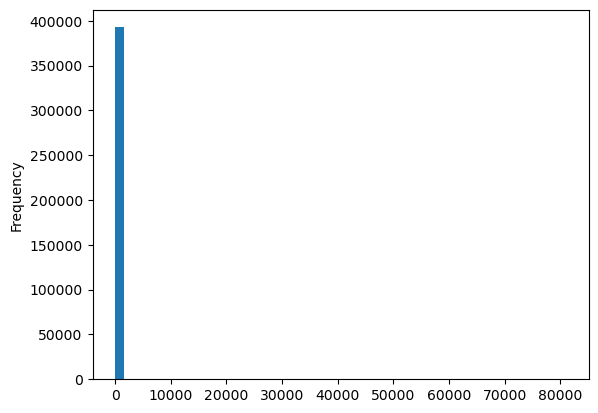

In [16]:
onlineretail_cleaned['Quantity'].plot(kind='hist', bins=50)

<AxesSubplot: ylabel='Frequency'>

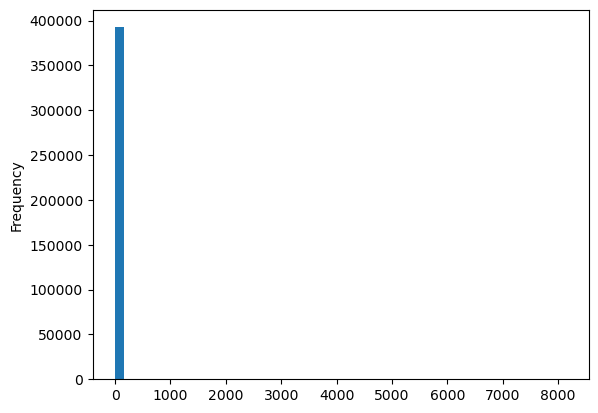

In [17]:
onlineretail_cleaned['UnitPrice'].plot(kind='hist', bins=50)

### Create set with outliers removed

In [29]:
# Calculate IQR for Quantity
Q1_quantity = onlineretail_cleaned['Quantity'].quantile(0.25)
Q3_quantity = onlineretail_cleaned['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

# Calculate IQR for UnitPrice
Q1_price = onlineretail_cleaned['UnitPrice'].quantile(0.25)
Q3_price = onlineretail_cleaned['UnitPrice'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Filtering out the outliers for both Quantity and UnitPrice
onlineretail_filtered = onlineretail_cleaned[
    ((onlineretail_cleaned['Quantity'] >= (Q1_quantity - 1.5 * IQR_quantity)) & 
     (onlineretail_cleaned['Quantity'] <= (Q3_quantity + 1.5 * IQR_quantity))) &
    ((onlineretail_cleaned['UnitPrice'] >= (Q1_price - 1.5 * IQR_price)) & 
     (onlineretail_cleaned['UnitPrice'] <= (Q3_price + 1.5 * IQR_price)))
]

# Creating a dataset for outliers in Quantity and UnitPrice
onlineretail_outliers = onlineretail_cleaned[
    (onlineretail_cleaned['Quantity'] < (Q1_quantity - 1.5 * IQR_quantity)) | 
    (onlineretail_cleaned['Quantity'] > (Q3_quantity + 1.5 * IQR_quantity)) |
    (onlineretail_cleaned['UnitPrice'] < (Q1_price - 1.5 * IQR_price)) | 
    (onlineretail_cleaned['UnitPrice'] > (Q3_price + 1.5 * IQR_price))
]

### Outliers removed dataset : IQR +/- 1.5 Filtered

In [30]:
onlineretail_filtered.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,333234.000000,333234.000000,333234.000000,333234.000000
mean,7.550682,2.194218,15318.903614,12.902273
std,6.777237,1.546015,1711.175915,13.214967
min,1.000000,0.001000,12347.000000,0.001000
25%,2.000000,1.250000,13988.000000,3.900000
50%,6.000000,1.650000,15235.000000,10.140000
75%,12.000000,2.950000,16814.000000,17.400000
max,27.000000,7.500000,18287.000000,178.800000


<AxesSubplot: ylabel='Frequency'>

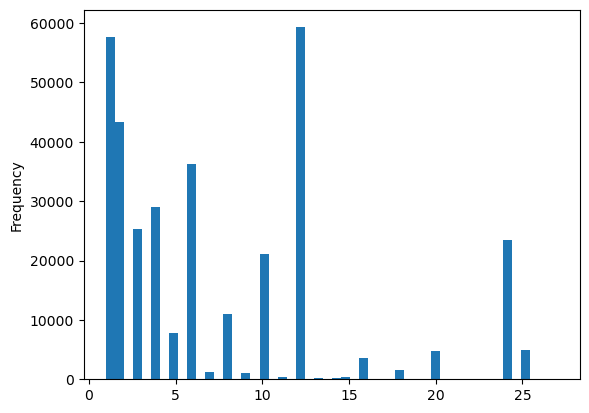

In [31]:
onlineretail_filtered['Quantity'].plot(kind='hist', bins=50)

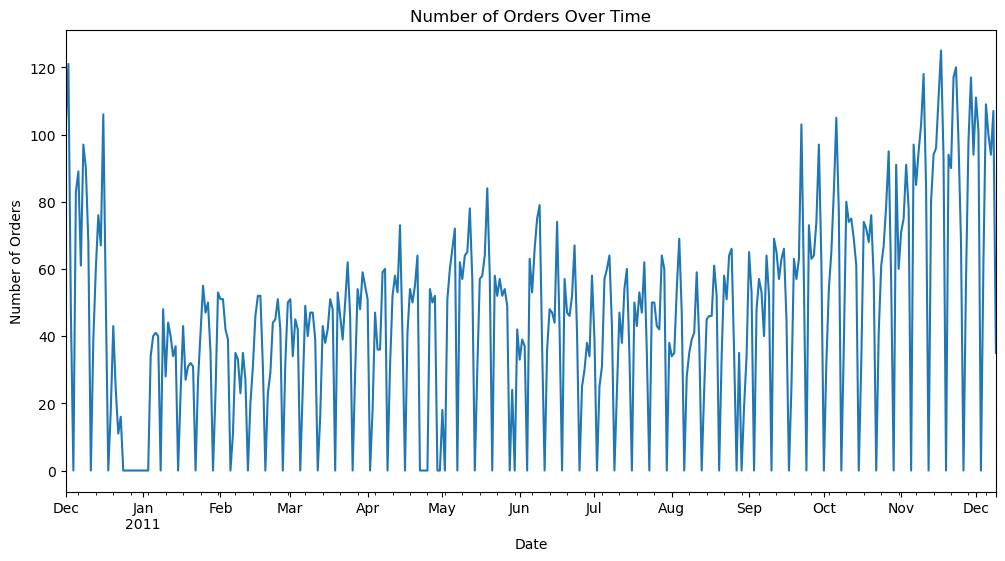

In [32]:
import matplotlib.pyplot as plt

# Resampling to a daily frequency
daily_orders = onlineretail_filtered.resample('D', on='InvoiceDate').InvoiceNo.nunique()

# Plotting
plt.figure(figsize=(12, 6))
daily_orders.plot()
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

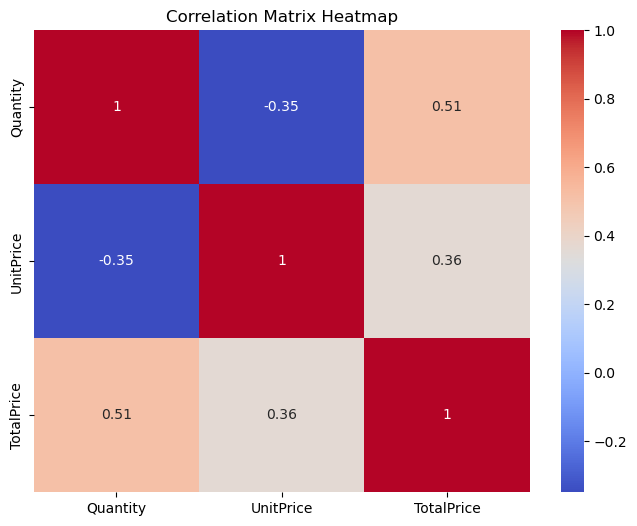

In [33]:
import seaborn as sns

# Calculate the correlation matrix
corr = onlineretail_filtered[['Quantity', 'UnitPrice', 'TotalPrice']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


<AxesSubplot: >

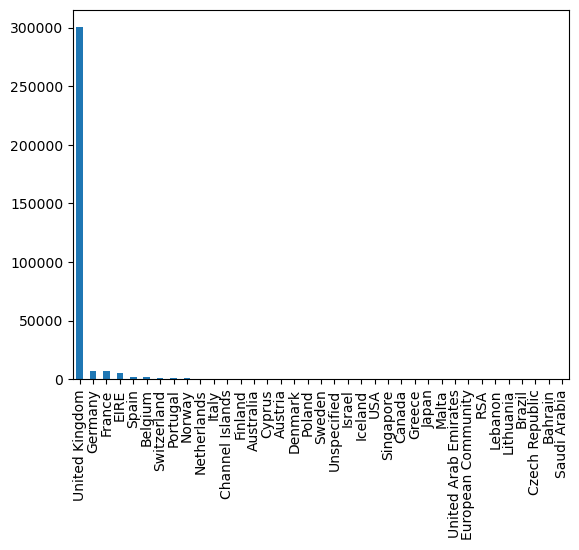

In [34]:
# For Country
onlineretail_filtered['Country'].value_counts().plot(kind='bar')


In [35]:
customer_data = onlineretail_cleaned.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',
    'TotalPrice': ['mean', 'sum']
}).rename(columns={'nunique': 'TotalOrders', 'mean': 'AverageOrderValue', 'sum': 'TotalSpend'})


In [36]:
customer_data

InvoiceNo        TotalPrice           
           TotalOrders AverageOrderValue TotalSpend
CustomerID                                         
12346                1      77183.600000   77183.60
12347                7         23.681319    4310.00
12348                4         57.975484    1797.24
12349                1         24.076027    1757.55
12350                1         19.670588     334.40
...                ...               ...        ...
18280                1         18.060000     180.60
18281                1         11.545714      80.82
18282                2         14.837500     178.05
18283               16          2.837074    2045.53
18287                3         26.246857    1837.28

[4338 rows x 3 columns]

<AxesSubplot: >

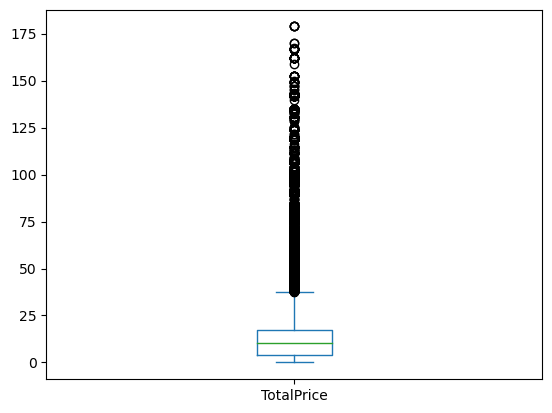

In [37]:
# Box plot for TotalPrice
onlineretail_filtered['TotalPrice'].plot(kind='box')


In [38]:
onlineretail_outliers.describe()

,Quantity,UnitPrice,CustomerID,TotalPrice
count,59458.000000,59458.000000,59458.000000,59458.000000
mean,44.331427,8.347627,15113.768643,77.159217
std,462.339384,56.760670,1716.369909,796.699886
min,1.000000,0.040000,12346.000000,1.740000
25%,2.000000,1.450000,13736.000000,15.900000
50%,4.000000,7.950000,14911.000000,25.500000
75%,48.000000,9.950000,16656.000000,72.000000
max,80995.000000,8142.750000,18287.000000,168469.600000


## Step 2: RFM Analysis

### **Recency (R)**: Time since last purchase. Calculate the number of days since the last purchase for each customer.

In [44]:
# Find the most recent date in the dataset for the recency calculation
latest_date = onlineretail_filtered['InvoiceDate'].max()

In [54]:
# Calculate Recency for each customer
# Group by CustomerID, and for each group, subtract the max InvoiceDate from the latest_date
recency = onlineretail_filtered.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latest_date - x.max()).days})

In [55]:
# Rename the column for clarity
recency.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

# Display the first few rows of the Recency DataFrame
recency.head()

,Recency
CustomerID,
12347,1
12348,248
12349,18
12350,309
12352,35


### **Frequency (F)**: Number of purchases. Count the total number of purchases for each customer.

In [57]:
# Calculate Frequency
frequency = onlineretail_filtered.groupby('CustomerID')['InvoiceNo'].nunique()
frequency = frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']
frequency.head()

,CustomerID,Frequency
0,12347,7
1,12348,3
2,12349,1
3,12350,1
4,12352,7


In [63]:
frequency['Frequency'].value_counts().sort_index()

1      1487
2       819
3       484
4       377
5       225
6       165
7       130
8        95
9        69
10       54
11       47
12       28
13       31
14       19
15       20
16       16
17       19
18       13
19       10
20        7
21        9
22        4
23        3
24        7
25        7
26        9
27        1
28        5
29        1
30        3
31        3
33        1
34        2
36        2
37        4
39        2
40        1
41        1
45        1
46        1
52        1
54        1
78        1
80        1
90        1
91        1
123       1
193       1
196       1
Name: Frequency, dtype: int64

### **Monetary (M)**: Total amount spent. Calculate the total amount spent by each customer.

In [51]:
# Calculate Monetary value
monetary = onlineretail_filtered.groupby('CustomerID')['TotalPrice'].sum()
monetary = monetary.reset_index()
monetary.columns = ['CustomerID', 'Monetary']
monetary.head()

,CustomerID,Monetary
0,12347,3314.73
1,12348,90.20
2,12349,999.15
3,12350,294.40
4,12352,1130.94


In [64]:
# Merge Recency, Frequency, and Monetary dataframes to create the RFM dataframe
# Assuming you have recency, frequency, and monetary as separate DataFrames
rfm = recency.merge(frequency, on='CustomerID')
rfm = rfm.merge(monetary, on='CustomerID')

# Now you can assign scores to R, F, and M
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

# Define custom bins for Frequency
frequency_bins = [0, 2, 4, 6, 8, max(frequency['Frequency']) + 1]
frequency_labels = [1, 2, 3, 4, 5]
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=frequency_labels)

# Adjusting the Monetary scoring
try:
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])
except ValueError:
    rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5], duplicates='drop')

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Display the first few rows of the RFM DataFrame
rfm.head()



,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,12347,1,7,3314.73,5,4,5,545
1,12348,248,3,90.20,1,2,1,121
2,12349,18,1,999.15,4,1,4,414
3,12350,309,1,294.40,1,1,2,112
4,12352,35,7,1130.94,3,4,4,344


## Step 3: Segmentation

### **Score Assignment**: Assign scores to R, F, and M. For example, use quintiles (1-5 scale) where 1 is the lowest and 5 is the highest.


In [65]:
# Assigning scores to Recency, Frequency, and Monetary values
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])  # Note the reverse scoring for recency
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1, 2, 3, 4, 5])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Segment customers (example of segmentation, you can customize it)
# Define your segments based on business logic
# For instance, '555' can be 'Best Customers', '111' can be 'Low-Value Customers', etc.

# Display the first few rows of the segmented RFM DataFrame
rfm.head()


ValueError: Bin edges must be unique: array([  1.,   1.,   2.,   3.,   5., 196.]).
You can drop duplicate edges by setting the 'duplicates' kwarg

### **Segment Creation**: Based on R, F, and M scores, create segments. You can use methods like K-means clustering for more sophisticated segmentation.

### **Segment Description**: Name and describe each segment, e.g., “Loyal High Spenders”, “Recent One-Time Shoppers”, etc.

## Step 5: Presentation Delivery
- Introduction: Explain the RFM model and its relevance.
- Methodology: Detail how you cleaned the data and created the segments.
- Findings: Present each segment with its characteristics.
- Insights and Recommendations: Offer insights into customer behavior and suggest strategies for each segment.
- Conclusion: Summarize the value of this segmentation for the business.